# Exploratory Data Analysis on the Walmart Dataset

## import required lib


In [1]:
!pip install ipywidgets

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [2]:
from tqdm.notebook import tqdm as tqdm

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
import matplotlib.pyplot as plt

!pip install prophet
from prophet import Prophet

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

Importing plotly failed. Interactive plots will not work.


## read data

In [4]:
filepath = './data'

In [5]:
calendar = pd.read_csv(filepath +'/calendar.csv')
sample_submission = pd.read_csv(filepath +'/sample_submission.csv')
sell_prices = pd.read_csv(filepath +'/sell_prices.csv')
sales_train_validation = pd.read_csv(filepath +'/sales_train_validation.csv')
sales_train_evaluation = pd.read_csv(filepath +'/sales_train_evaluation.csv')

In [6]:
print('calendar shape : ' , calendar.shape)
calendar.head(5)

calendar shape :  (1969, 14)


date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [39]:
sample_submission

id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
0      HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
1      HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
2      HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
3      HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
4      HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
...                              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
60975    FOODS_3_823_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60976    FOODS_3_824_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60977    FOODS_3_825_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60978    FOODS_3_826_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   
60979    FOODS_3_827_WI_3_evaluation   0   0   0   0   0   0   0   0   0  ...   

       F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
0        0    0    0    0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
60975    0    0    0    0    0    0    0    0    0    0  
60976    0    0    0    0    0    0    0    0    0    0  
60977    0    0    0    0    0    0    0    0    0    0  
60978    0    0    0    0    0    0    0    0    0    0  
60979    0    0    0    0    0    0    0    0    0    0  

[60980 rows x 29 columns]

In [40]:
sample_submission.shape

(60980, 29)

note : weekday 1 = saturday , 7 = friday

In [7]:
print(calendar['event_type_1'].unique())
print(calendar['event_name_1'].unique())
print(calendar['event_type_2'].unique())
print(calendar['event_name_2'].unique())

[nan 'Sporting' 'Cultural' 'National' 'Religious']
[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
[nan 'Cultural' 'Religious']
[nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]


In [8]:
print('sales_train_validation_shape : ' , sales_train_validation.shape)
sales_train_validation.head(5)

sales_train_validation_shape :  (30490, 1919)


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [9]:
print('sales_train_evaluation_shape : ' , sales_train_evaluation.shape)
sales_train_evaluation.head(5)

sales_train_evaluation_shape :  (30490, 1947)


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

### forecast sales for 28 forecast days. The sample submission has the following format:

In [10]:
print('sample_submission_shape : ' , sample_submission.shape)
sample_submission.head(5)

sample_submission_shape :  (60980, 29)


id  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  \
0  HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
1  HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
2  HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
3  HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   
4  HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0  ...   

   F19  F20  F21  F22  F23  F24  F25  F26  F27  F28  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0    0  

[5 rows x 29 columns]

In [11]:
#find what inside sample_submission
print(sample_submission['id'].value_counts())
print('\n')
print(sample_submission[sample_submission.id.str.contains("evaluation")].value_counts())

HOBBIES_2_101_TX_1_evaluation      1
HOBBIES_1_005_TX_1_evaluation      1
FOODS_1_073_WI_2_evaluation        1
FOODS_3_439_WI_2_validation        1
FOODS_2_349_CA_1_evaluation        1
                                  ..
HOUSEHOLD_2_337_CA_3_evaluation    1
HOUSEHOLD_2_438_CA_4_evaluation    1
FOODS_3_212_TX_2_validation        1
HOUSEHOLD_2_212_CA_4_validation    1
FOODS_2_061_CA_4_validation        1
Name: id, Length: 60980, dtype: int64


id                               F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  F11  F12  F13  F14  F15  F16  F17  F18  F19  F20  F21  F22  F23  F24  F25  F26  F27  F28
FOODS_1_001_CA_1_evaluation      0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0      1
HOUSEHOLD_1_032_CA_3_evaluation  0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0      1
HOUSEHOLD_1_033_TX_1_evaluation  0   0   0   0   0   0

evaluation 30490 row and validation 30490 row with column = 29 (28 days forcasting)

## Merge Datafram to show datastamp


In [12]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c]

In [13]:
train_sales_datestamp_df = sales_train_validation.set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

### Some chart on cat_id with datestamp

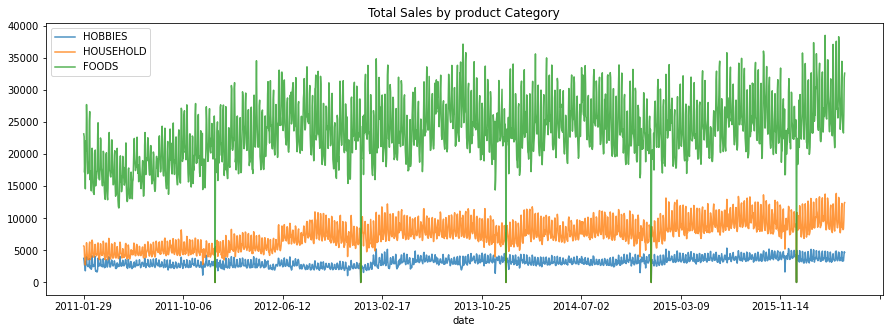

In [14]:
for i in sales_train_validation['cat_id'].unique():
    items_col = [c for c in train_sales_datestamp_df.columns if i in c]
    train_sales_datestamp_df[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by product Category')
plt.legend(sales_train_validation['cat_id'].unique())
plt.show()

In [15]:
train_sales_datestamp_df.head()

HOBBIES_1_001_CA_1_validation  HOBBIES_1_002_CA_1_validation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_003_CA_1_validation  HOBBIES_1_004_CA_1_validation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_005_CA_1_validation  HOBBIES_1_006_CA_1_validation  \
date                                                                       
2011-01-29                              0                              0   
2011-01-30                              0                              0   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_007_CA_1_validation  HOBBIES_1_008_CA_1_validation  \
date                                                                       
2011-01-29                              0                             12   
2011-01-30                              0                             15   
2011-01-31                              0                              0   
2011-02-01                              0                              0   
2011-02-02                              0                              0   

            HOBBIES_1_009_CA_1_validation  HOBBIES_1_010_CA_1_validation  ...  \
date                                                                      ...   
2011-01-29                              2                              0  ...   
2011-01-30                              0                              0  ...   
2011-01-31                              7                              1  ...   
2011-02-01                              3                              0  ...   
2011-02-02                              0                              0  ...   

            FOODS_3_818_WI_3_validation  FOODS_3_819_WI_3_validation  \
date                                                                   
2011-01-29                            0                           14   
2011-01-30                            0                           11   
2011-01-31                            0                            5   
2011-02-01                            0                            6   
2011-02-02                            0                            5   

            FOODS_3_820_WI_3_validation  FOODS_3_821_WI_3_validation  \
date                                                                   
2011-01-29                            1                            0   
2011-01-30                            1                            0   
2011-01-31                            1                            0   
2011-02-01                            1                            0   
2011-02-02                            1                            0   

            FOODS_3_822_WI_3_validation  FOODS_3_823_WI_3_validation  \
date                                                                   
2011-01-29                            4                            0   
2011-01-30                            4                            0   
2011-01-31    

In [16]:
train_sales_datestamp_df.index

Index(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02',
       '2011-02-03', '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07',
       ...
       '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
       '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24'],
      dtype='object', name='date', length=1913)

In [17]:
train_sales_datestamp_df.shape

(1913, 30490)

the last datestamp is 2016-04-24

In [18]:
train_sales_datestamp_df.iloc[-28:1913]
#test slice dataframe

HOBBIES_1_001_CA_1_validation  HOBBIES_1_002_CA_1_validation  \
date                                                                       
2016-03-28                              1                              1   
2016-03-29                              0                              0   
2016-03-30                              0                              0   
2016-03-31                              0                              0   
2016-04-01                              0                              0   
2016-04-02                              0                              0   
2016-04-03                              1                              0   
2016-04-04                              0                              0   
2016-04-05                              4                              0   
2016-04-06                              2                              0   
2016-04-07                              3                              0   
2016-04-08                              0                              0   
2016-04-09                              1                              0   
2016-04-10                              2                              0   
2016-04-11                              0                              0   
2016-04-12                              0                              0   
2016-04-13                              0                              0   
2016-04-14                              1                              0   
2016-04-15                              1                              0   
2016-04-16                              3                              0   
2016-04-17                              0                              0   
2016-04-18                              1                              0   
2016-04-19                              1                              0   
2016-04-20                              1                              1   
2016-04-21                              3                              0   
2016-04-22                              0                              0   
2016-04-23                              1                              0   
2016-04-24                              1                              0   

            HOBBIES_1_003_CA_1_validation  HOBBIES_1_004_CA_1_validation  \
date                                                                       
2016-03-28                              0                              0   
2016-03-29                              0                              0   
2016-03-30                              0                              0   
2016-03-31                              0                              0   
2016-04-01                              0                              3   
2016-04-02                              0                              1   
2016-04-03                              1                              2   
2016-04-04                              0                              1   
2016-04-05                              0                              3   
2016-04-06                              0                              1   
2016-04-07                              1                              0   
2016-04-08                              0                              2   
2016-04-09                              0                              5   
2016-04-10                              0                              4   
2016-04-11                              0                              2   
2016-04-12                              0                              0   
2016-04-13                              1                              3   
2016-04-14                              2                              0   
2016-04-15                              2                              1   
2016-04-16                              1                              0   
2016-04-17                              2                  

# objective to forcasting quantities of each product id sales in total (not separate by branch and state)

### FB Prophet Forecast Using Individual Product IDs

#### prepare for FB Prophet : holidays

In [19]:
#for prophet model:
# ~ is not contain (Tilde in condition python mean It means bitwise not, inversing boolean mask)
df_event_1 = pd.DataFrame({'holiday': 'Event 1', 'ds': calendar[~calendar['event_name_1'].isna()]['date']})
df_event_2 = pd.DataFrame({'holiday': 'Event 2', 'ds': calendar[~calendar['event_name_2'].isna()]['date']})
df_snapca = pd.DataFrame({'holiday': 'snap_CA', 'ds': calendar[calendar['snap_CA'] == 1]['date']})
df_snaptx = pd.DataFrame({'holiday': 'snap_TX', 'ds': calendar[calendar['snap_TX'] == 1]['date']})
df_snapwi = pd.DataFrame({'holiday': 'snap_WI', 'ds': calendar[calendar['snap_WI'] == 1]['date']})
holidays = pd.concat((df_event_1, df_event_2, df_snapca, df_snaptx, df_snapwi))
holidays.sample(7)

holiday          ds
160   snap_WI  2011-07-08
1224  snap_CA  2014-06-06
1226  snap_CA  2014-06-08
1107  snap_TX  2014-02-09
460   snap_CA  2012-05-03
1290  snap_WI  2014-08-11
770   snap_WI  2013-03-09

#### prep input data (one id) 

In [20]:
def single_id_ts_input(idx, threshold_date='2016-02-02'):
    
    '''
    selects and makes the timeseries adjusted for fb prophet model by adjusting names
    of columns
    
    inputs: product_id
    
    returns: time series with data specified in format for prophet
    
    '''
    datestamp = [date for date in train_sales_datestamp_df.index]
    id_series =  sales_train_validation[(sales_train_validation.id == idx )]
    item_ts = pd.DataFrame({'ds': datestamp}, index=range(len(datestamp)))
    item_ts['y'] = id_series[d_cols].T.values.reshape(-1)

    #Choosing the threshold date near to the date where prediction needs to be made 
    # threshold_date='2016-02-22'
    # threshold_date = pd.to_datetime(date) 
    filter = item_ts['ds'] > threshold_date

    single_id_ts_input = item_ts[filter][['ds', 'y']]
    
    
    return single_id_ts_input


In [21]:
#@title
# item_ts['y'] = id_series[d_cols].T.values.reshape(-1)
# len([date for date in train_sales_datestamp_df.index])
# same

# sales_train_validation[(sales_train_validation.id == 'FOODS_3_090_CA_3_validation' )].values[0].transpose()

# sales_train_validation[(sales_train_validation.id == 'FOODS_3_090_CA_3_validation' )].T.values.reshape(-1)  #### reshape(-1) is flatten

In [22]:
#@title
# exsample_id = 'FOODS_3_090_CA_3_validation'

# datestamp = [date for date in train_sales_datestamp_df.index]
# id_series =  sales_train_validation[(sales_train_validation.id == exsample_id )]
# item_ts = pd.DataFrame({'ds': datestamp}, index=range(len(datestamp)))
# item_ts['y'] = id_series[d_cols].T.values.reshape(-1)
# item_ts

In [23]:
#@title
# threshold_date='2016-02-22'
# # threshold_date = pd.to_datetime(date) 
# filter = item_ts['ds'] > threshold_date

# item_ts_filter = item_ts[filter][['ds', 'y']]
# item_ts_filter.sample(10)

#### test fit and plot fb prophet (one id)

In [24]:
def prophet_plot(data, periods=28, freq='D'):
    
    '''
    plots the fb prophet model for the data of id specified
    
    inputs: data (product id along with data for previous days), periods(predictions for 
    the next days to be made)
    
    returns: plots the immediate historic data along with forecast for the future made
    '''
    
    mod_params = { 'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 

    sales_model = Prophet(**mod_params, holidays=holidays, interval_width=0.95)
    #data['cap'] = data['y'].max() + data['y'].std() * 0.05 #incase logistic model growth used
    #fitting the model
    sales_model.fit(data)
    future = sales_model.make_future_dataframe(periods, freq)
    #future['cap'] = data['cap'].max() #incase logistic model growth used in params

    sales_forecast = sales_model.predict(future)
    print(sales_forecast[['ds', 'yhat']].tail(28))
    
    
    plt.figure(figsize=(15,3))
    #fig, ax = plt.subplots(figsize=(14,5))
    sales_model.plot(sales_forecast, xlabel='Date', ylabel='Unit Sales Behavior')
    #plt.axvline(x=sales_forecast[sales_forecast.ds == '2016-04-22']['ds'], color='r')
    #ax.axvline(threshold_date, color='g', linestyle='--', label='Prediction Onwards')
    #ax.legend(loc='upper left')
    #ax.set(title='Avg Sales of Units', ylabel='');
    plt.title("Unit Sales Trend on Each ID")
    plt.show()

    


In [25]:
sales_train_validation[(sales_train_validation.id == 'HOBBIES_1_003_CA_1_validation' )]

id        item_id    dept_id   cat_id store_id  \
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
2       CA    0    0    0    0  ...       2       1       2       1       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
2       1       0       1       1       1  

[1 rows x 1919 columns]

10:56:49 - cmdstanpy - INFO - Chain [1] start processing
10:56:49 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat
82  2016-04-25  0.156790
83  2016-04-26  0.274516
84  2016-04-27  0.331257
85  2016-04-28  0.406469
86  2016-04-29  0.631267
87  2016-04-30  0.905703
88  2016-05-01  0.915733
89  2016-05-02  0.144646
90  2016-05-03  0.624932
91  2016-05-04  0.211819
92  2016-05-05  0.656267
93  2016-05-06  0.998657
94  2016-05-07  1.278613
95  2016-05-08  0.694848
96  2016-05-09  0.518426
97  2016-05-10  0.158951
98  2016-05-11  0.843375
99  2016-05-12  0.925908
100 2016-05-13  1.050258
101 2016-05-14  1.198859
102 2016-05-15  1.348085
103 2016-05-16  0.173210
104 2016-05-17  0.303122
105 2016-05-18  0.365606
106 2016-05-19  0.448409
107 2016-05-20  0.696083
108 2016-05-21  1.114811
109 2016-05-22  0.876804


<Figure size 1080x216 with 0 Axes>

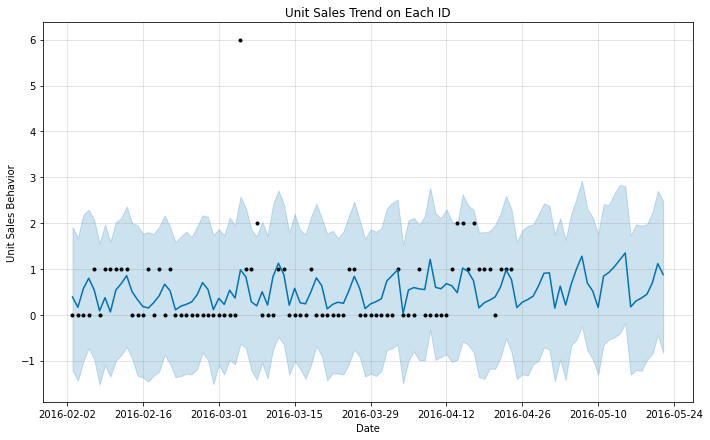

In [26]:
exsample_id = 'HOBBIES_1_003_CA_1_validation'
single_id1_ts = single_id_ts_input(exsample_id)
prophet_plot(single_id1_ts)

## All id forcast with fb prophet

### Prophet Tuning hyperparameter tuning with grid search

In [27]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

#Note : the code was generated using the explanation at the following link
#https://www.baeldung.com/cs/mape-vs-wape-vs-wmape

def fbprophet_tuning_per_single_id(id_data, changepoint_prior_list=[0.5, 0.6, 0.7], 
                                   changepoint_range_list=[0.6, 0.7, 0.8], 
                                   n_changepoints_list=[50, 60]):
    param_grid = {  
        'changepoint_prior_scale': changepoint_prior_list,
        'changepoint_range': changepoint_range_list,
        'n_changepoints' : n_changepoints_list
    }

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    #wapes = []  # Store the RMSEs for each params here
    wmapes = []

    # Use cross validation to evaluate all parameters
    for params in all_params:
        mod = Prophet(**params).fit(id_data)  # Fit model with given params
        df_cv = cross_validation(mod, initial = '32 days', period = '3 days', horizon='28 days')
        #df_p = performance_metrics(df_cv, rolling_window=1)
        #rmses.append(df_p['rmse'].values[0])
        #wapes.append(np.sum(df_cv['yhat'] - df_cv['y']) / (np.sum(df_cv['y'])))
        weighted_coeff = (df_cv['yhat'] - df_cv['y'])/(df_cv['yhat'] - df_cv['y']).mean()
        wmapes.append(np.sum((df_cv['yhat'] - df_cv['y']) * weighted_coeff )/ np.sum(weighted_coeff*df_cv['y']) )

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['wmape'] = wmapes
    print(tuning_results)
    
fbprophet_tuning_per_single_id(single_id1_ts)

10:56:50 - cmdstanpy - INFO - Chain [1] start processing
10:56:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

10:56:51 - cmdstanpy - INFO - Chain [1] start processing
10:56:51 - cmdstanpy - INFO - Chain [1] done processing
10:56:52 - cmdstanpy - INFO - Chain [1] start processing
10:56:52 - cmdstanpy - INFO - Chain [1] done processing
10:56:52 - cmdstanpy - INFO - Chain [1] start processing
10:56:52 - cmdstanpy - INFO - Chain [1] done processing
10:56:53 - cmdstanpy - INFO - Chain [1] start processing
10:56:53 - cmdstanpy - INFO - Chain [1] done processing
10:56:53 - cmdstanpy - INFO - Chain [1] start processing
10:56:54 - cmdstanpy - INFO - Chain [1] done processing
10:56:54 - cmdstanpy - INFO - Chain [1] start processing
10:56:54 - cmdstanpy - INFO - Chain [1] done processing
10:56:54 - cmdstanpy - INFO - Chain [1] start processing
10:56:55 - cmdstanpy - INFO - Chain [1] done processing
10:56:55 - cmdstanpy - INFO - Chain [1] start processing
10:56:55 - cmdstanpy - INFO - Chain [1] done processing
10:56:56 - cmdstanpy - INFO - Chain [1] start processing
10:56:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:56:57 - cmdstanpy - INFO - Chain [1] start processing
10:56:57 - cmdstanpy - INFO - Chain [1] done processing
10:56:57 - cmdstanpy - INFO - Chain [1] start processing
10:56:58 - cmdstanpy - INFO - Chain [1] done processing
10:56:58 - cmdstanpy - INFO - Chain [1] start processing
10:56:58 - cmdstanpy - INFO - Chain [1] done processing
10:56:59 - cmdstanpy - INFO - Chain [1] start processing
10:56:59 - cmdstanpy - INFO - Chain [1] done processing
10:56:59 - cmdstanpy - INFO - Chain [1] start processing
10:56:59 - cmdstanpy - INFO - Chain [1] done processing
10:57:00 - cmdstanpy - INFO - Chain [1] start processing
10:57:00 - cmdstanpy - INFO - Chain [1] done processing
10:57:00 - cmdstanpy - INFO - Chain [1] start processing
10:57:00 - cmdstanpy - INFO - Chain [1] done processing
10:57:01 - cmdstanpy - INFO - Chain [1] start processing
10:57:01 - cmdstanpy - INFO - Chain [1] done processing
10:57:01 - cmdstanpy - INFO - Chain [1] start processing
10:57:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:02 - cmdstanpy - INFO - Chain [1] start processing
10:57:02 - cmdstanpy - INFO - Chain [1] done processing
10:57:03 - cmdstanpy - INFO - Chain [1] start processing
10:57:03 - cmdstanpy - INFO - Chain [1] done processing
10:57:03 - cmdstanpy - INFO - Chain [1] start processing
10:57:04 - cmdstanpy - INFO - Chain [1] done processing
10:57:04 - cmdstanpy - INFO - Chain [1] start processing
10:57:04 - cmdstanpy - INFO - Chain [1] done processing
10:57:05 - cmdstanpy - INFO - Chain [1] start processing
10:57:05 - cmdstanpy - INFO - Chain [1] done processing
10:57:05 - cmdstanpy - INFO - Chain [1] start processing
10:57:05 - cmdstanpy - INFO - Chain [1] done processing
10:57:06 - cmdstanpy - INFO - Chain [1] start processing
10:57:06 - cmdstanpy - INFO - Chain [1] done processing
10:57:06 - cmdstanpy - INFO - Chain [1] start processing
10:57:07 - cmdstanpy - INFO - Chain [1] done processing
10:57:07 - cmdstanpy - INFO - Chain [1] start processing
10:57:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:08 - cmdstanpy - INFO - Chain [1] start processing
10:57:08 - cmdstanpy - INFO - Chain [1] done processing
10:57:09 - cmdstanpy - INFO - Chain [1] start processing
10:57:09 - cmdstanpy - INFO - Chain [1] done processing
10:57:09 - cmdstanpy - INFO - Chain [1] start processing
10:57:10 - cmdstanpy - INFO - Chain [1] done processing
10:57:10 - cmdstanpy - INFO - Chain [1] start processing
10:57:10 - cmdstanpy - INFO - Chain [1] done processing
10:57:11 - cmdstanpy - INFO - Chain [1] start processing
10:57:11 - cmdstanpy - INFO - Chain [1] done processing
10:57:11 - cmdstanpy - INFO - Chain [1] start processing
10:57:11 - cmdstanpy - INFO - Chain [1] done processing
10:57:12 - cmdstanpy - INFO - Chain [1] start processing
10:57:12 - cmdstanpy - INFO - Chain [1] done processing
10:57:12 - cmdstanpy - INFO - Chain [1] start processing
10:57:12 - cmdstanpy - INFO - Chain [1] done processing
10:57:13 - cmdstanpy - INFO - Chain [1] start processing
10:57:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:14 - cmdstanpy - INFO - Chain [1] start processing
10:57:14 - cmdstanpy - INFO - Chain [1] done processing
10:57:14 - cmdstanpy - INFO - Chain [1] start processing
10:57:15 - cmdstanpy - INFO - Chain [1] done processing
10:57:15 - cmdstanpy - INFO - Chain [1] start processing
10:57:15 - cmdstanpy - INFO - Chain [1] done processing
10:57:16 - cmdstanpy - INFO - Chain [1] start processing
10:57:16 - cmdstanpy - INFO - Chain [1] done processing
10:57:16 - cmdstanpy - INFO - Chain [1] start processing
10:57:17 - cmdstanpy - INFO - Chain [1] done processing
10:57:17 - cmdstanpy - INFO - Chain [1] start processing
10:57:17 - cmdstanpy - INFO - Chain [1] done processing
10:57:18 - cmdstanpy - INFO - Chain [1] start processing
10:57:18 - cmdstanpy - INFO - Chain [1] done processing
10:57:18 - cmdstanpy - INFO - Chain [1] start processing
10:57:19 - cmdstanpy - INFO - Chain [1] done processing
10:57:19 - cmdstanpy - INFO - Chain [1] start processing
10:57:20 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:20 - cmdstanpy - INFO - Chain [1] start processing
10:57:21 - cmdstanpy - INFO - Chain [1] done processing
10:57:21 - cmdstanpy - INFO - Chain [1] start processing
10:57:21 - cmdstanpy - INFO - Chain [1] done processing
10:57:22 - cmdstanpy - INFO - Chain [1] start processing
10:57:22 - cmdstanpy - INFO - Chain [1] done processing
10:57:22 - cmdstanpy - INFO - Chain [1] start processing
10:57:22 - cmdstanpy - INFO - Chain [1] done processing
10:57:23 - cmdstanpy - INFO - Chain [1] start processing
10:57:23 - cmdstanpy - INFO - Chain [1] done processing
10:57:23 - cmdstanpy - INFO - Chain [1] start processing
10:57:24 - cmdstanpy - INFO - Chain [1] done processing
10:57:24 - cmdstanpy - INFO - Chain [1] start processing
10:57:24 - cmdstanpy - INFO - Chain [1] done processing
10:57:25 - cmdstanpy - INFO - Chain [1] start processing
10:57:25 - cmdstanpy - INFO - Chain [1] done processing
10:57:25 - cmdstanpy - INFO - Chain [1] start processing
10:57:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:27 - cmdstanpy - INFO - Chain [1] start processing
10:57:27 - cmdstanpy - INFO - Chain [1] done processing
10:57:27 - cmdstanpy - INFO - Chain [1] start processing
10:57:27 - cmdstanpy - INFO - Chain [1] done processing
10:57:28 - cmdstanpy - INFO - Chain [1] start processing
10:57:28 - cmdstanpy - INFO - Chain [1] done processing
10:57:28 - cmdstanpy - INFO - Chain [1] start processing
10:57:28 - cmdstanpy - INFO - Chain [1] done processing
10:57:29 - cmdstanpy - INFO - Chain [1] start processing
10:57:29 - cmdstanpy - INFO - Chain [1] done processing
10:57:29 - cmdstanpy - INFO - Chain [1] start processing
10:57:29 - cmdstanpy - INFO - Chain [1] done processing
10:57:30 - cmdstanpy - INFO - Chain [1] start processing
10:57:30 - cmdstanpy - INFO - Chain [1] done processing
10:57:30 - cmdstanpy - INFO - Chain [1] start processing
10:57:31 - cmdstanpy - INFO - Chain [1] done processing
10:57:31 - cmdstanpy - INFO - Chain [1] start processing
10:57:32 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:32 - cmdstanpy - INFO - Chain [1] start processing
10:57:32 - cmdstanpy - INFO - Chain [1] done processing
10:57:33 - cmdstanpy - INFO - Chain [1] start processing
10:57:33 - cmdstanpy - INFO - Chain [1] done processing
10:57:34 - cmdstanpy - INFO - Chain [1] start processing
10:57:34 - cmdstanpy - INFO - Chain [1] done processing
10:57:34 - cmdstanpy - INFO - Chain [1] start processing
10:57:34 - cmdstanpy - INFO - Chain [1] done processing
10:57:35 - cmdstanpy - INFO - Chain [1] start processing
10:57:35 - cmdstanpy - INFO - Chain [1] done processing
10:57:35 - cmdstanpy - INFO - Chain [1] start processing
10:57:35 - cmdstanpy - INFO - Chain [1] done processing
10:57:36 - cmdstanpy - INFO - Chain [1] start processing
10:57:36 - cmdstanpy - INFO - Chain [1] done processing
10:57:36 - cmdstanpy - INFO - Chain [1] start processing
10:57:36 - cmdstanpy - INFO - Chain [1] done processing
10:57:37 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:38 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:40 - cmdstanpy - INFO - Chain [1] done processing
10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:40 - cmdstanpy - INFO - Chain [1] done processing
10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:41 - cmdstanpy - INFO - Chain [1] done processing
10:57:41 - cmdstanpy - INFO - Chain [1] start processing
10:57:41 - cmdstanpy - INFO - Chain [1] done processing
10:57:42 - cmdstanpy - INFO - Chain [1] start processing
10:57:42 - cmdstanpy - INFO - Chain [1] done processing
10:57:42 - cmdstanpy - INFO - Chain [1] start processing
10:57:43 - cmdstanpy - INFO - Chain [1] done processing
10:57:43 - cmdstanpy - INFO - Chain [1] start processing
10:57:44 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:45 - cmdstanpy - INFO - Chain [1] start processing
10:57:45 - cmdstanpy - INFO - Chain [1] done processing
10:57:45 - cmdstanpy - INFO - Chain [1] start processing
10:57:45 - cmdstanpy - INFO - Chain [1] done processing
10:57:46 - cmdstanpy - INFO - Chain [1] start processing
10:57:46 - cmdstanpy - INFO - Chain [1] done processing
10:57:46 - cmdstanpy - INFO - Chain [1] start processing
10:57:46 - cmdstanpy - INFO - Chain [1] done processing
10:57:47 - cmdstanpy - INFO - Chain [1] start processing
10:57:47 - cmdstanpy - INFO - Chain [1] done processing
10:57:48 - cmdstanpy - INFO - Chain [1] start processing
10:57:48 - cmdstanpy - INFO - Chain [1] done processing
10:57:48 - cmdstanpy - INFO - Chain [1] start processing
10:57:48 - cmdstanpy - INFO - Chain [1] done processing
10:57:49 - cmdstanpy - INFO - Chain [1] start processing
10:57:49 - cmdstanpy - INFO - Chain [1] done processing
10:57:49 - cmdstanpy - INFO - Chain [1] start processing
10:57:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:51 - cmdstanpy - INFO - Chain [1] start processing
10:57:51 - cmdstanpy - INFO - Chain [1] done processing
10:57:51 - cmdstanpy - INFO - Chain [1] start processing
10:57:52 - cmdstanpy - INFO - Chain [1] done processing
10:57:52 - cmdstanpy - INFO - Chain [1] start processing
10:57:52 - cmdstanpy - INFO - Chain [1] done processing
10:57:53 - cmdstanpy - INFO - Chain [1] start processing
10:57:53 - cmdstanpy - INFO - Chain [1] done processing
10:57:53 - cmdstanpy - INFO - Chain [1] start processing
10:57:53 - cmdstanpy - INFO - Chain [1] done processing
10:57:54 - cmdstanpy - INFO - Chain [1] start processing
10:57:54 - cmdstanpy - INFO - Chain [1] done processing
10:57:54 - cmdstanpy - INFO - Chain [1] start processing
10:57:55 - cmdstanpy - INFO - Chain [1] done processing
10:57:55 - cmdstanpy - INFO - Chain [1] start processing
10:57:55 - cmdstanpy - INFO - Chain [1] done processing
10:57:56 - cmdstanpy - INFO - Chain [1] start processing
10:57:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:57:57 - cmdstanpy - INFO - Chain [1] start processing
10:57:57 - cmdstanpy - INFO - Chain [1] done processing
10:57:58 - cmdstanpy - INFO - Chain [1] start processing
10:57:58 - cmdstanpy - INFO - Chain [1] done processing
10:57:58 - cmdstanpy - INFO - Chain [1] start processing
10:57:59 - cmdstanpy - INFO - Chain [1] done processing
10:57:59 - cmdstanpy - INFO - Chain [1] start processing
10:57:59 - cmdstanpy - INFO - Chain [1] done processing
10:58:00 - cmdstanpy - INFO - Chain [1] start processing
10:58:00 - cmdstanpy - INFO - Chain [1] done processing
10:58:00 - cmdstanpy - INFO - Chain [1] start processing
10:58:00 - cmdstanpy - INFO - Chain [1] done processing
10:58:01 - cmdstanpy - INFO - Chain [1] start processing
10:58:01 - cmdstanpy - INFO - Chain [1] done processing
10:58:01 - cmdstanpy - INFO - Chain [1] start processing
10:58:02 - cmdstanpy - INFO - Chain [1] done processing
10:58:02 - cmdstanpy - INFO - Chain [1] start processing
10:58:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:58:03 - cmdstanpy - INFO - Chain [1] start processing
10:58:04 - cmdstanpy - INFO - Chain [1] done processing
10:58:04 - cmdstanpy - INFO - Chain [1] start processing
10:58:04 - cmdstanpy - INFO - Chain [1] done processing
10:58:04 - cmdstanpy - INFO - Chain [1] start processing
10:58:05 - cmdstanpy - INFO - Chain [1] done processing
10:58:05 - cmdstanpy - INFO - Chain [1] start processing
10:58:05 - cmdstanpy - INFO - Chain [1] done processing
10:58:06 - cmdstanpy - INFO - Chain [1] start processing
10:58:06 - cmdstanpy - INFO - Chain [1] done processing
10:58:06 - cmdstanpy - INFO - Chain [1] start processing
10:58:06 - cmdstanpy - INFO - Chain [1] done processing
10:58:07 - cmdstanpy - INFO - Chain [1] start processing
10:58:07 - cmdstanpy - INFO - Chain [1] done processing
10:58:07 - cmdstanpy - INFO - Chain [1] start processing
10:58:07 - cmdstanpy - INFO - Chain [1] done processing
10:58:08 - cmdstanpy - INFO - Chain [1] start processing
10:58:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:58:09 - cmdstanpy - INFO - Chain [1] start processing
10:58:09 - cmdstanpy - INFO - Chain [1] done processing
10:58:10 - cmdstanpy - INFO - Chain [1] start processing
10:58:10 - cmdstanpy - INFO - Chain [1] done processing
10:58:10 - cmdstanpy - INFO - Chain [1] start processing
10:58:10 - cmdstanpy - INFO - Chain [1] done processing
10:58:11 - cmdstanpy - INFO - Chain [1] start processing
10:58:11 - cmdstanpy - INFO - Chain [1] done processing
10:58:11 - cmdstanpy - INFO - Chain [1] start processing
10:58:11 - cmdstanpy - INFO - Chain [1] done processing
10:58:12 - cmdstanpy - INFO - Chain [1] start processing
10:58:12 - cmdstanpy - INFO - Chain [1] done processing
10:58:12 - cmdstanpy - INFO - Chain [1] start processing
10:58:13 - cmdstanpy - INFO - Chain [1] done processing
10:58:13 - cmdstanpy - INFO - Chain [1] start processing
10:58:13 - cmdstanpy - INFO - Chain [1] done processing
10:58:14 - cmdstanpy - INFO - Chain [1] start processing
10:58:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:58:15 - cmdstanpy - INFO - Chain [1] start processing
10:58:15 - cmdstanpy - INFO - Chain [1] done processing
10:58:15 - cmdstanpy - INFO - Chain [1] start processing
10:58:15 - cmdstanpy - INFO - Chain [1] done processing
10:58:16 - cmdstanpy - INFO - Chain [1] start processing
10:58:16 - cmdstanpy - INFO - Chain [1] done processing
10:58:16 - cmdstanpy - INFO - Chain [1] start processing
10:58:17 - cmdstanpy - INFO - Chain [1] done processing
10:58:17 - cmdstanpy - INFO - Chain [1] start processing
10:58:17 - cmdstanpy - INFO - Chain [1] done processing
10:58:18 - cmdstanpy - INFO - Chain [1] start processing
10:58:18 - cmdstanpy - INFO - Chain [1] done processing
10:58:18 - cmdstanpy - INFO - Chain [1] start processing
10:58:18 - cmdstanpy - INFO - Chain [1] done processing
10:58:19 - cmdstanpy - INFO - Chain [1] start processing
10:58:19 - cmdstanpy - INFO - Chain [1] done processing
10:58:19 - cmdstanpy - INFO - Chain [1] start processing
10:58:21 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:58:21 - cmdstanpy - INFO - Chain [1] start processing
10:58:21 - cmdstanpy - INFO - Chain [1] done processing
10:58:21 - cmdstanpy - INFO - Chain [1] start processing
10:58:22 - cmdstanpy - INFO - Chain [1] done processing
10:58:22 - cmdstanpy - INFO - Chain [1] start processing
10:58:22 - cmdstanpy - INFO - Chain [1] done processing
10:58:23 - cmdstanpy - INFO - Chain [1] start processing
10:58:23 - cmdstanpy - INFO - Chain [1] done processing
10:58:23 - cmdstanpy - INFO - Chain [1] start processing
10:58:23 - cmdstanpy - INFO - Chain [1] done processing
10:58:24 - cmdstanpy - INFO - Chain [1] start processing
10:58:24 - cmdstanpy - INFO - Chain [1] done processing
10:58:24 - cmdstanpy - INFO - Chain [1] start processing
10:58:25 - cmdstanpy - INFO - Chain [1] done processing
10:58:25 - cmdstanpy - INFO - Chain [1] start processing
10:58:25 - cmdstanpy - INFO - Chain [1] done processing
10:58:26 - cmdstanpy - INFO - Chain [1] start processing
10:58:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:58:27 - cmdstanpy - INFO - Chain [1] start processing
10:58:27 - cmdstanpy - INFO - Chain [1] done processing
10:58:28 - cmdstanpy - INFO - Chain [1] start processing
10:58:28 - cmdstanpy - INFO - Chain [1] done processing
10:58:28 - cmdstanpy - INFO - Chain [1] start processing
10:58:28 - cmdstanpy - INFO - Chain [1] done processing
10:58:29 - cmdstanpy - INFO - Chain [1] start processing
10:58:29 - cmdstanpy - INFO - Chain [1] done processing
10:58:29 - cmdstanpy - INFO - Chain [1] start processing
10:58:30 - cmdstanpy - INFO - Chain [1] done processing
10:58:30 - cmdstanpy - INFO - Chain [1] start processing
10:58:30 - cmdstanpy - INFO - Chain [1] done processing
10:58:31 - cmdstanpy - INFO - Chain [1] start processing
10:58:31 - cmdstanpy - INFO - Chain [1] done processing
10:58:31 - cmdstanpy - INFO - Chain [1] start processing
10:58:32 - cmdstanpy - INFO - Chain [1] done processing
10:58:32 - cmdstanpy - INFO - Chain [1] start processing
10:58:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

10:58:34 - cmdstanpy - INFO - Chain [1] start processing
10:58:34 - cmdstanpy - INFO - Chain [1] done processing
10:58:34 - cmdstanpy - INFO - Chain [1] start processing
10:58:35 - cmdstanpy - INFO - Chain [1] done processing
10:58:35 - cmdstanpy - INFO - Chain [1] start processing
10:58:35 - cmdstanpy - INFO - Chain [1] done processing
10:58:36 - cmdstanpy - INFO - Chain [1] start processing
10:58:36 - cmdstanpy - INFO - Chain [1] done processing
10:58:36 - cmdstanpy - INFO - Chain [1] start processing
10:58:36 - cmdstanpy - INFO - Chain [1] done processing
10:58:37 - cmdstanpy - INFO - Chain [1] start processing
10:58:37 - cmdstanpy - INFO - Chain [1] done processing
10:58:38 - cmdstanpy - INFO - Chain [1] start processing
10:58:38 - cmdstanpy - INFO - Chain [1] done processing
10:58:38 - cmdstanpy - INFO - Chain [1] start processing
10:58:39 - cmdstanpy - INFO - Chain [1] done processing


    changepoint_prior_scale  changepoint_range  n_changepoints      wmape
0                       0.5                0.6              50  -5.661195
1                       0.5                0.6              60  -5.661195
2                       0.5                0.7              50  -8.578265
3                       0.5                0.7              60  -8.578265
4                       0.5                0.8              50 -14.368800
5                       0.5                0.8              60 -14.368800
6                       0.6                0.6              50  -5.659114
7                       0.6                0.6              60  -5.659114
8                       0.6                0.7              50 -10.494957
9                       0.6                0.7              60 -10.494957
10                      0.6                0.8              50 -16.969686
11                      0.6                0.8              60 -16.969686
12                      0.7           

from result choos no.6 and no.7 below

|  -  |      changepoint_prior_scale      |      changepoint_range      |n_changepoints      |  wmape |
|----------|:-------------:|:-------------:|:-------------:|------:|
| 6 | 0.6 |  0.6 | 50 | -5.659114 |
| 7 | 0.6 |  0.6 | 60 | -5.659114 |


### All id time series preparation

In [30]:
# train_sales_datestamp_df.iloc[-28:1913]
# sales_forecast_list = []
# del sales_forecast_list

In [31]:
train_sales_datestamp_df.iloc[-28:].reset_index()

date  HOBBIES_1_001_CA_1_validation  HOBBIES_1_002_CA_1_validation  \
0   2016-03-28                              1                              1   
1   2016-03-29                              0                              0   
2   2016-03-30                              0                              0   
3   2016-03-31                              0                              0   
4   2016-04-01                              0                              0   
5   2016-04-02                              0                              0   
6   2016-04-03                              1                              0   
7   2016-04-04                              0                              0   
8   2016-04-05                              4                              0   
9   2016-04-06                              2                              0   
10  2016-04-07                              3                              0   
11  2016-04-08                              0                              0   
12  2016-04-09                              1                              0   
13  2016-04-10                              2                              0   
14  2016-04-11                              0                              0   
15  2016-04-12                              0                              0   
16  2016-04-13                              0                              0   
17  2016-04-14                              1                              0   
18  2016-04-15                              1                              0   
19  2016-04-16                              3                              0   
20  2016-04-17                              0                              0   
21  2016-04-18                              1                              0   
22  2016-04-19                              1                              0   
23  2016-04-20                              1                              1   
24  2016-04-21                              3                              0   
25  2016-04-22                              0                              0   
26  2016-04-23                              1                              0   
27  2016-04-24                              1                              0   

    HOBBIES_1_003_CA_1_validation  HOBBIES_1_004_CA_1_validation  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              3   
5                               0                              1   
6                               1                              2   
7                               0                              1   
8                               0                              3   
9                               0                              1   
10                              1                              0   
11                              0                              2   
12                              0                              5   
13                              0                              4   
14                              0                              2   
15                              0                              0   
16                              1                              3   
17                              2                              0   
18                              2                              1   
19                              1                              0   
20                              2                              5   
21                              1                              4   
22                              1                              1   
23                              1                        

In [32]:
train_sales_datestamp_df.iloc[-28:].reset_index().columns[1]
#28 days and 3049 productid columns and 10 branchs

'HOBBIES_1_001_CA_1_validation'

In [ ]:
def prophet_pred_df(start=1913, end=2100):
    '''
    makes a dataframe with prophet predictions made for each product_id 
    
    input: start = product_id start, end = product_id to be the last one for prediction
    
    returns: dataframe with predictions made for the next 28 days using prophet of the product
             ids specified in input
    '''

    for idc in tqdm(range(start, end)):
        train_sub = train_sales_datestamp_df.iloc[-28:, idc].reset_index()
        idx = train_sub.columns[1]
        train_sub.set_axis(['ds', 'y'], axis=1, inplace=True)
        mod_params = { 'changepoint_prior_scale': 0.5 , 'changepoint_range': 0.6,
                      'n_changepoints': 50, 
                      'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 
        sales_model = Prophet(**mod_params, interval_width=0.95)
        #data['cap'] = data['y'].max() + data['y'].std() * 0.05 #incase logistic model growth used

        ######fitting the prophet model########
        
        sales_model.fit(train_sub)
        future = sales_model.make_future_dataframe(28, 'D')
        #future['cap'] = data['cap'].max() #incase logistic model growth used in params
        sales_forecast = sales_model.predict(future)[-28:]
        sales_forecast_list.append( (np.append(np.array([idx]), sales_forecast['yhat'].values.transpose())) )
    
    return sales_forecast_list

#list_table would collect all entries

list_table = prophet_pred_df()

In [33]:
train_sales_datestamp_df.shape

(1913, 30490)

In [34]:
train_sales_datestamp_df.iloc[-28:, 2-1].reset_index()

date  HOBBIES_1_002_CA_1_validation
0   2016-03-28                              1
1   2016-03-29                              0
2   2016-03-30                              0
3   2016-03-31                              0
4   2016-04-01                              0
5   2016-04-02                              0
6   2016-04-03                              0
7   2016-04-04                              0
8   2016-04-05                              0
9   2016-04-06                              0
10  2016-04-07                              0
11  2016-04-08                              0
12  2016-04-09                              0
13  2016-04-10                              0
14  2016-04-11                              0
15  2016-04-12                              0
16  2016-04-13                              0
17  2016-04-14                              0
18  2016-04-15                              0
19  2016-04-16                              0
20  2016-04-17                              0
21  2016-04-18                              0
22  2016-04-19                              0
23  2016-04-20                              1
24  2016-04-21                              0
25  2016-04-22                              0
26  2016-04-23                              0
27  2016-04-24                              0

In [35]:
sales_forecast_list1=[]
for idc in tqdm(range(1, 30491)):
        train_sub = train_sales_datestamp_df.iloc[-28:, idc].reset_index()
        idx = train_sub.columns[1]
        train_sub.set_axis(['ds', 'y'], axis=1, inplace=True)
        mod_params = { 'changepoint_prior_scale': 0.5 , 'changepoint_range': 0.6,
                      'n_changepoints': 50, 
                      'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 
        sales_model = Prophet(**mod_params, interval_width=0.95)
        #data['cap'] = data['y'].max() + data['y'].std() * 0.05 #incase logistic model growth used

        ######fitting the prophet model########
        
        sales_model.fit(train_sub)
        future = sales_model.make_future_dataframe(28, 'D')
        #future['cap'] = data['cap'].max() #incase logistic model growth used in params
        sales_forecast = sales_model.predict(future)[-28:]
        sales_forecast_list1.append( (np.append(np.array([idx]), sales_forecast['yhat'].values.transpose())) )


  0%|          | 0/30489 [00:00<?, ?it/s]

11:12:27 - cmdstanpy - INFO - Chain [1] start processing
11:12:27 - cmdstanpy - INFO - Chain [1] done processing
11:12:28 - cmdstanpy - INFO - Chain [1] start processing
11:12:28 - cmdstanpy - INFO - Chain [1] done processing
11:12:28 - cmdstanpy - INFO - Chain [1] start processing
11:12:29 - cmdstanpy - INFO - Chain [1] done processing
11:12:29 - cmdstanpy - INFO - Chain [1] start processing
11:12:29 - cmdstanpy - INFO - Chain [1] done processing
11:12:29 - cmdstanpy - INFO - Chain [1] start processing
11:12:30 - cmdstanpy - INFO - Chain [1] done processing
11:12:30 - cmdstanpy - INFO - Chain [1] start processing
11:12:30 - cmdstanpy - INFO - Chain [1] done processing
11:12:30 - cmdstanpy - INFO - Chain [1] start processing
11:12:31 - cmdstanpy - INFO - Chain [1] done processing
11:12:31 - cmdstanpy - INFO - Chain [1] start processing
11:12:31 - cmdstanpy - INFO - Chain [1] done processing
11:12:32 - cmdstanpy - INFO - Chain [1] start processing
11:12:32 - cmdstanpy - INFO - Chain [1]

In [36]:
df_prophet_forecast_all_ids = pd.DataFrame(sales_forecast_list1)
df_prophet_forecast_all_ids.columns = sample_submission.columns
df_prophet_forecast_all_ids

id                      F1  \
0      HOBBIES_1_002_CA_1_validation     0.29469045827487944   
1      HOBBIES_1_003_CA_1_validation      0.8780874011461822   
2      HOBBIES_1_004_CA_1_validation      3.4086238443576193   
3      HOBBIES_1_005_CA_1_validation      0.5247972558422239   
4      HOBBIES_1_006_CA_1_validation  -0.0004819304498797772   
...                              ...                     ...   
30484    FOODS_3_823_WI_3_validation     -1.3790768416167618   
30485    FOODS_3_824_WI_3_validation    0.004307795122945998   
30486    FOODS_3_825_WI_3_validation      0.6038515399087797   
30487    FOODS_3_826_WI_3_validation      1.0805292269917792   
30488    FOODS_3_827_WI_3_validation    -0.12163704682348714   

                           F2                    F3                       F4  \
0      -0.0036144111808110078    1.9649506359538529     -0.02799704819595264   
1          0.8445086321618183     1.370295152068371        1.408638816302102   
2          1.4879297293088682    1.6143750960841747      0.48612783727433134   
3          0.3304700933706217    2.4105549326605478       3.1887406981466144   
4        -0.07579834396456357   -0.2546327900546781    0.0019388540838575672   
...                       ...                   ...                      ...   
30484     0.16925775149945907    0.2603381405218281        0.676857420603722   
30485   -0.014333897971492059  0.004554057117129504     0.007183376167838569   
30486      0.0456574489827263    0.1309532798192308  -0.00042834187444569066   
30487       1.011384854248394    0.7499617869721457       1.4311856342246205   
30488    -0.08113331036135657  -0.04021013704081447     -0.12570013097460897   

                          F5                     F6                    F7  \
0      -0.022812844842501415  -0.018889209723166638   -0.0158968149393814   
1          1.827170219873057     1.2532261628582781    1.8772307085936044   
2         3.1435424477421248      5.186044841167238     4.671176823549716   
3         1.1713119283089455     1.9087373643005743     4.893239645337708   
4         -0.112809936888473   -0.06027565626570187   0.00499590736187947   
...                      ...                    ...                   ...   
30484     -2.573655640956628     0.5699413137570728     1.559132969645352   
30485    0.00960970208616472    -0.2506386754427764   -0.2762584755380447   
30486  -0.029557985833448316    -0.1816062595918838  -0.21220629283840645   
30487     1.5891030685189054     0.7340985089478815     2.497929710911049   
30488   -0.11893865915161149   -0.15390074185318148  -0.05934817576959668   

                         F8                      F9  ...  \
0        0.4665657239763277  -0.0055603451745572605  ...   
1         1.102636194197605      1.0528590162779188  ...   
2         3.894810265727699      1.6959213305586316  ...   
3        0.7180790929137613      0.4460979576606618  ...   
4      -0.13389536257471293     -0.5933010952819017  ...   
...                     ...                     ...  ...   
30484   -3.2242768635850303      0.3593830386388344  ...   
30485   -0.5019733466726022    -0.12102585382503706  ...   
30486   -0.7505059857106648    -0.10502662715991304  ...   
30487    1.2155681441950603      1.1355654050574258  ...   
30488   -0.2293284674965324    -0.14489964771471292  ...   

                        F19                   F20                    F21  \
0      -0.04277168887607628  -0.03444327269621068  -0.028259685550431676   
1        2.6425288467520716     1.795192471146662      2.664726520196517   
2         3.972714072695724     6.528670936980879      5.858550390823753   
3         1.884087851249143     3.021873324926102      7.632758832650484   
4        -0.505164431544544  -0.22819827025499884   0.016604103424786014   
...                     ...                   ...                    ...   
30484    -6.476638681145024    1.3497898537044979      3.502548158417189   
30485   0.04375204667112294   -0.9608875810062004 

In [42]:
df_prophet_forecast_all_ids.shape

(30489, 29)

In [37]:
df_prophet_forecast_all_ids.to_csv('df_prophet_forecast_all_ids.csv')

In [38]:
df_prophet_forecast_all_ids[df_prophet_forecast_all_ids.id =='FOODS_1_001_CA_1_validation']

id                  F1                  F2  \
1611  FOODS_1_001_CA_1_validation  2.5661754744438694  0.6295777451669419   

                      F3                   F4                  F5  \
1611  1.2849042293246704  0.19867072712877717  1.2734963001403719   

                      F6                  F7                  F8  \
1611  0.5769043508007048  0.4166151965507317  2.3466289483957867   

                      F9  ...                 F19                F20  \
1611  0.5750484057122269  ...  1.0443904196257752  0.471766448093111   

                     F21                 F22                 F23  \
1611  0.3396877798759431  1.9075358963075382  0.4659897268025375   

                    F24                 F25                 F26  \
1611  0.946854940962863  0.1457387077119606  0.9298374793623424   

                     F27                 F28  
1611  0.4191974967345831  0.3012240715362689  

[1 rows x 29 columns]

In [ ]:
###########Making the dataframe of predictions for all ids############
req_sales_df = sales_train_validation.iloc[:, np.r_[0,-28:0]].melt('id', var_name='d', value_name='sale')
req_sales_df = req_sales_df.merge(calendar.loc[:,['d','date','wday']])
#req_sales_df
lastest_date = int(req_sales_df.d.max()[2:])
req_sales_df = req_sales_df.groupby(['id','wday'])['sale'].mean()
req_sales_df.head(22)

id                           wday
FOODS_1_001_CA_1_validation  1       0.75
                             2       0.50
                             3       3.00
                             4       0.75
                             5       1.50
                             6       0.25
                             7       1.50
FOODS_1_001_CA_2_validation  1       0.00
                             2       4.50
                             3       0.25
                             4       0.50
                             5       1.25
                             6       1.00
                             7       0.25
FOODS_1_001_CA_3_validation  1       1.50
                             2       3.75
                             3       0.25
                             4       0.00
                             5       0.50
                             6       0.00
                             7       0.00
FOODS_1_001_CA_4_validation  1       0.25
Name: sale, dtype: float64

# Misc. Note for work


### Seasonality, Holiday Effects, And Regressors 

Modeling Holidays and Special Events
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events

In [ ]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
holidays

holiday         ds  lower_window  upper_window
0     playoff 2008-01-13             0             1
1     playoff 2009-01-03             0             1
2     playoff 2010-01-16             0             1
3     playoff 2010-01-24             0             1
4     playoff 2010-02-07             0             1
5     playoff 2011-01-08             0             1
6     playoff 2013-01-12             0             1
7     playoff 2014-01-12             0             1
8     playoff 2014-01-19             0             1
9     playoff 2014-02-02             0             1
10    playoff 2015-01-11             0             1
11    playoff 2016-01-17             0             1
12    playoff 2016-01-24             0             1
13    playoff 2016-02-07             0             1
0   superbowl 2010-02-07             0             1
1   superbowl 2014-02-02             0             1
2   superbowl 2016-02-07             0             1